### I.12 Combined observables X x Z


In [7]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [8]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():
    qml.PauliX(0)
    qml.PauliX(1)
    qml.Hadamard(1)
    return [qml.expval(qml.PauliZ(0) @ qml.PauliX(1))]

print(create_one_minus())


[tensor(1., requires_grad=True)]


### I 1.13 Combined observables


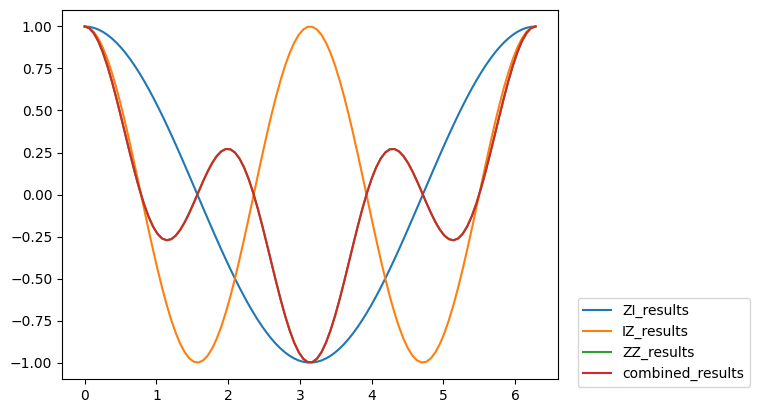

In [9]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    qml.RX(theta, wires=0)
    qml.RX(2*theta, wires=1)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    qml.RX(theta, wires=0)
    qml.RX(2*theta, wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    combined_results = np.zeros(len(ZI_results))
    combined_results = ZI_results * IZ_results
    return combined_results
 
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

plt.clf()
plt.plot(theta, ZI_results, label="ZI_results")
plt.plot(theta, IZ_results, label="IZ_results")
plt.plot(theta, ZZ_results, label="ZZ_results")
plt.plot(theta, combined_results, label="combined_results")

plt.legend(loc="right",bbox_to_anchor=(1.4, 0.1))

plt.show()